In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/content/car_price_dataset.csv')

In [ ]:
df.head()

,Brand,Model,Year,Engine_Size,Fuel_Type,Transmission,Mileage,Doors,Owner_Count,Price
0,Kia,Rio,2020,4.2,Diesel,Manual,289944,3,5,8501
1,Chevrolet,Malibu,2012,2.0,Hybrid,Automatic,5356,2,3,12092
2,Mercedes,GLA,2020,4.2,Diesel,Automatic,231440,4,2,11171
3,Audi,Q5,2023,2.0,Electric,Manual,160971,2,1,11780
4,Volkswagen,Golf,2003,2.6,Hybrid,Semi-Automatic,286618,3,3,2867


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         10000 non-null  object 
 1   Model         10000 non-null  object 
 2   Year          10000 non-null  int64  
 3   Engine_Size   10000 non-null  float64
 4   Fuel_Type     10000 non-null  object 
 5   Transmission  10000 non-null  object 
 6   Mileage       10000 non-null  int64  
 7   Doors         10000 non-null  int64  
 8   Owner_Count   10000 non-null  int64  
 9   Price         10000 non-null  int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 781.4+ KB


In [4]:
df['Year'] = pd.to_datetime(df['Year'], format='%Y', errors='ignore')

df["Year"] = df["Year"].dt.year

<ipython-input-4-0e54be50f3ff>:1: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  df['Year'] = pd.to_datetime(df['Year'], format='%Y', errors='ignore')


In [5]:
df.isna().sum()

,0
Brand,0
Model,0
Year,0
Engine_Size,0
Fuel_Type,0
Transmission,0
Mileage,0
Doors,0
Owner_Count,0
Price,0


In [6]:
df.describe()

,Year,Engine_Size,Mileage,Doors,Owner_Count,Price
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,2011.543700,3.000560,149239.111800,3.497100,2.991100,8852.96440
std,6.897699,1.149324,86322.348957,1.110097,1.422682,3112.59681
min,2000.000000,1.000000,25.000000,2.000000,1.000000,2000.00000
25%,2006.000000,2.000000,74649.250000,3.000000,2.000000,6646.00000
50%,2012.000000,3.000000,149587.000000,3.000000,3.000000,8858.50000
75%,2017.000000,4.000000,223577.500000,4.000000,4.000000,11086.50000
max,2023.000000,5.000000,299947.000000,5.000000,5.000000,18301.00000


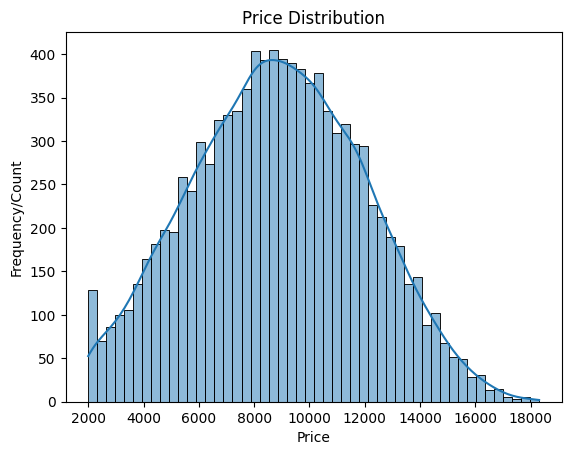

In [7]:
sns.histplot(df['Price'], bins = 50, kde = True)
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency/Count')
plt.show()

In [8]:
df["Price"].skew()

0.026136215676512354

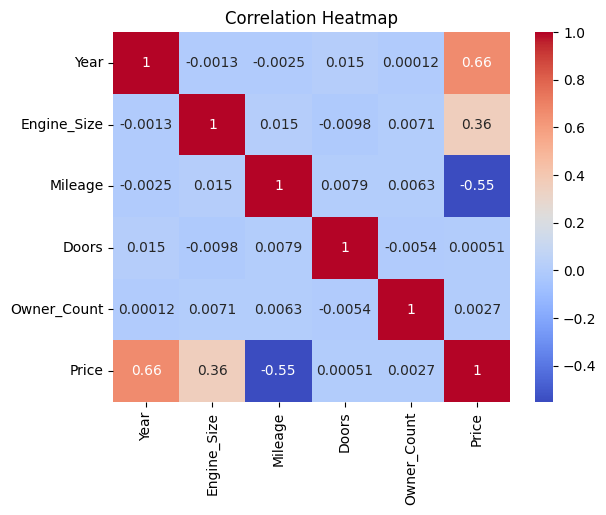

In [9]:
sns.heatmap(df.corr(numeric_only= True), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

Text(0.5, 1.0, 'Fuel Type vs. Price')

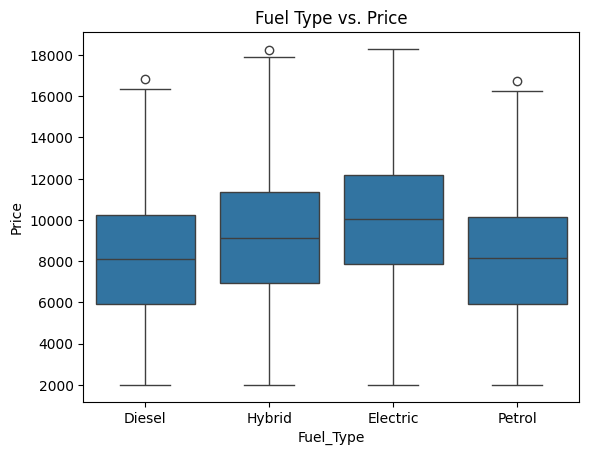

In [10]:
sns.boxplot(x = 'Fuel_Type', y = 'Price', data = df)
plt.title("Fuel Type vs. Price")

Text(0.5, 1.0, 'Transmission vs. Price')

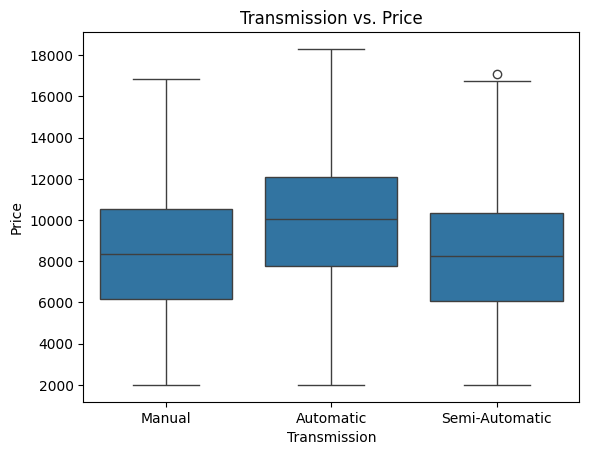

In [11]:
sns.boxplot(x="Transmission", y="Price", data=df)
plt.title("Transmission vs. Price")

Text(0.5, 1.0, 'Mileage vs. Price')

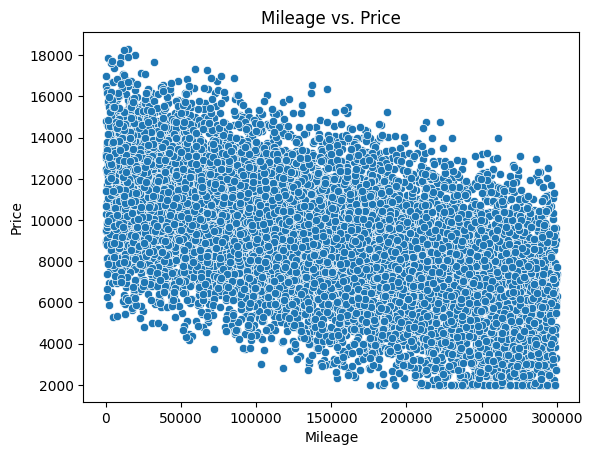

In [ ]:
sns.scatterplot(x = 'Mileage', y = 'Price', data = df)
plt.title("Mileage vs. Price")

Text(0.5, 1.0, 'Year vs. Price')

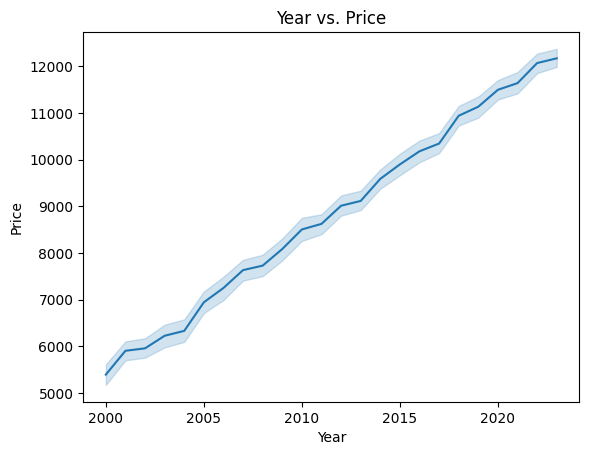

In [ ]:
sns.lineplot(x = 'Year', y = 'Price', data = df)
plt.title("Year vs. Price")

Text(0.5, 1.0, 'Engine Size vs. Price')

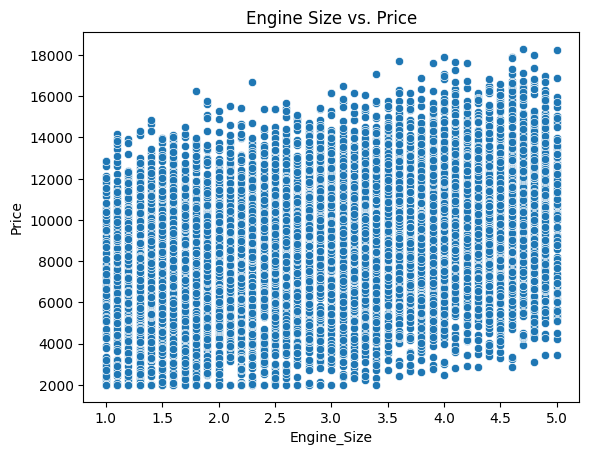

In [ ]:
sns.scatterplot(x = 'Engine_Size', y = 'Price', data = df)
plt.title("Engine Size vs. Price")

In [12]:
Feature = ['Year', 'Mileage', 'Engine_Size']
Target = 'Price'

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [16]:
  X_train, X_test, y_train, y_test = train_test_split(df[Feature], df[Target], test_size=0.2, random_state=42)

In [17]:
lm = LinearRegression()

In [20]:
lm.fit(X_train, y_train)

LinearRegression()

In [21]:
y_pred = lm.predict(X_test)

In [22]:
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

In [25]:
print(f'R-squared: {r2:.2f}')
print(f'Mean Squared Error: {mse:.2f}')

R-squared: 0.88
Mean Squared Error: 1137718.10


In [26]:
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error: {rmse:.2f}')

Root Mean Squared Error: 1066.64


In [27]:
## Feature engineering

df['Car_Age'] = 2025 - df['Year']

df['Price_per_Liter'] = df['Price'] / df['Mileage']

df['Price_per_Mileage'] = df['Price'] / df['Mileage']

Luxary_brands = ['BMW', 'Mercedes', 'Audi', 'Lexus', 'Porsche']

df['Luxary_Car'] = df['Brand'].apply(lambda x: 1 if x in Luxary_brands else 0)

In [28]:
df['High_Mileage'] = df['Mileage'].apply(lambda x: 1 if x > 100000 else 0)

df.drop(columns = ['Year'], inplace = True)

df.head()

,Brand,Model,Engine_Size,Fuel_Type,Transmission,Mileage,Doors,Owner_Count,Price,Car_Age,Price_per_Liter,Price_per_Mileage,Luxary_Car,High_Mileage
0,Kia,Rio,4.2,Diesel,Manual,289944,3,5,8501,5,0.029319,0.029319,0,1
1,Chevrolet,Malibu,2.0,Hybrid,Automatic,5356,2,3,12092,13,2.257655,2.257655,0,0
2,Mercedes,GLA,4.2,Diesel,Automatic,231440,4,2,11171,5,0.048267,0.048267,1,1
3,Audi,Q5,2.0,Electric,Manual,160971,2,1,11780,2,0.073181,0.073181,1,1
4,Volkswagen,Golf,2.6,Hybrid,Semi-Automatic,286618,3,3,2867,22,0.010003,0.010003,0,1


In [29]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor

In [82]:
features = ["Car_Age", "Mileage", "Engine_Size", "Price_per_Mileage", "Price_per_Liter"
    "Luxary_Car","High_Mileage", "Brand_BMW", "Brand_Chevrolet", "Brand_Ford", "Brand_Honda", "Brand_Hyundai",
    "Brand_Kia", "Brand_Mercedes", "Brand_Toyota", "Brand_Volkswagen",
    "Fuel_Type_Electric", "Fuel_Type_Hybrid", "Fuel_Type_Petrol",
    "Transmission_Manual", "Transmission_Semi-Automatic"
]

Target = 'Price'

In [83]:
X_train, X_test, y_train, y_test = train_test_split(df[features], df[Target], test_size=0.2, random_state=45)

lm.fit(X_train, y_train)

y_prediction = lm.predict(X_test)

rf = RandomForestRegressor(n_estimators=100, random_state=42)

rf.fit(X_train, y_train)

predi_rf = rf.predict(X_test)

In [84]:
r2_for_linearRegression = r2_score(y_test, y_prediction)
rmse_for_linearRegression = np.sqrt(mean_squared_error(y_test, y_prediction))


r2_for_RandomForest = r2_score(y_test, predi_rf)
rmse_for_randomForest = np.sqrt(mean_squared_error(y_test, predi_rf))

In [85]:
print(f'R-squared for Linear Regression: {r2_for_linearRegression:.2f}')

print(f'RMSE for Linear Regression: {rmse_for_linearRegression:.2f}')

print(f'R-squared for Random Forest: {r2_for_RandomForest:.2f}')

print(f'RMSE for Random Forest: {rmse_for_randomForest:.2f}')

R-squared for Linear Regression: 1.00
RMSE for Linear Regression: 83.34
R-squared for Random Forest: 0.99
RMSE for Random Forest: 318.59


In [47]:
print(set(features) & set([Target]))

set()


In [69]:
feat = [
    "Car_Age", "Mileage", "Engine_Size", "Luxary_Car",
    "Brand_BMW", "Brand_Chevrolet", "Brand_Ford", "Brand_Honda", "Brand_Hyundai",
    "Brand_Kia", "Brand_Mercedes", "Brand_Toyota", "Brand_Volkswagen",
    "Fuel_Type_Electric", "Fuel_Type_Hybrid", "Fuel_Type_Petrol",
    "Transmission_Manual", "Transmission_Semi-Automatic"
]

In [70]:
X_train, X_test, Y_train, Y_test = train_test_split(df[feat], df[Target], test_size=0.2, random_state=47)
lm.fit(X_train, Y_train)
prediction = lm.predict(X_test)

In [71]:
linear = r2_score(Y_test, prediction)
rmse_linear = np.sqrt(mean_squared_error(Y_test, prediction))

In [72]:
print(f'R-squared for Linear Regression: {linear:.2f}')
print(f'RMSE for Linear Regression: {rmse_linear:.2f}')

R-squared for Linear Regression: 1.00
RMSE for Linear Regression: 74.62


In [52]:
print(X_train.shape, X_test.shape)

(8000, 19) (2000, 19)


In [53]:
duplicates = X_train.merge(X_test, how='inner')
print(f"Number of duplicate rows between train & test: {duplicates.shape[0]}")

Number of duplicate rows between train & test: 0


In [55]:
correlations = df[features + [Target]].corr()["Price"].sort_values(ascending=False)
print(correlations)

Price                          1.000000
Engine_Size                    0.357403
Fuel_Type_Electric             0.226043
Price_per_Liter                0.066888
Price_per_Mileage              0.066888
Fuel_Type_Hybrid               0.047637
Brand_Chevrolet                0.017456
Brand_Mercedes                 0.013171
Brand_Volkswagen               0.008166
Luxary_Car                     0.003535
Brand_Kia                      0.002866
Brand_Ford                    -0.000043
Brand_Toyota                  -0.005768
Brand_Hyundai                 -0.007976
Brand_BMW                     -0.015938
Brand_Honda                   -0.020167
Transmission_Manual           -0.112186
Transmission_Semi-Automatic   -0.133073
Fuel_Type_Petrol              -0.141650
High_Mileage                  -0.451108
Mileage                       -0.551227
Car_Age                       -0.663036
Name: Price, dtype: float64


In [59]:
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor(random_state=42)
tree.fit(X_train, y_train)
print("Decision Tree R²:", tree.score(X_test, Y_test))

Decision Tree R²: -0.9588857733472573


In [57]:
print(df[['Price', 'Car_Age', 'Mileage', 'Engine_Size']].describe())

             Price       Car_Age        Mileage   Engine_Size
count  10000.00000  10000.000000   10000.000000  10000.000000
mean    8852.96440     13.456300  149239.111800      3.000560
std     3112.59681      6.897699   86322.348957      1.149324
min     2000.00000      2.000000      25.000000      1.000000
25%     6646.00000      8.000000   74649.250000      2.000000
50%     8858.50000     13.000000  149587.000000      3.000000
75%    11086.50000     19.000000  223577.500000      4.000000
max    18301.00000     25.000000  299947.000000      5.000000


In [58]:
print("Train R²:", lm.score(X_train, y_train))
print("Test R²:", lm.score(X_test, y_test))

Train R²: -1.0162752410160691
Test R²: -0.9941610524554292


In [60]:
print(X_train.columns)

Index(['Car_Age', 'Mileage', 'Engine_Size', 'Luxary_Car', 'High_Mileage',
       'Brand_BMW', 'Brand_Chevrolet', 'Brand_Ford', 'Brand_Honda',
       'Brand_Hyundai', 'Brand_Kia', 'Brand_Mercedes', 'Brand_Toyota',
       'Brand_Volkswagen', 'Fuel_Type_Electric', 'Fuel_Type_Hybrid',
       'Fuel_Type_Petrol', 'Transmission_Manual',
       'Transmission_Semi-Automatic'],
      dtype='object')


In [61]:
from sklearn.model_selection import cross_val_score

lm = LinearRegression()
scores = cross_val_score(lm, X_train, y_train, cv=5, scoring="r2")
print("Cross-Validation R² Scores:", scores)
print("Mean R²:", np.mean(scores))

Cross-Validation R² Scores: [-0.00529136 -0.00217732 -0.00283341 -0.00805191 -0.00375689]
Mean R²: -0.004422176069874118


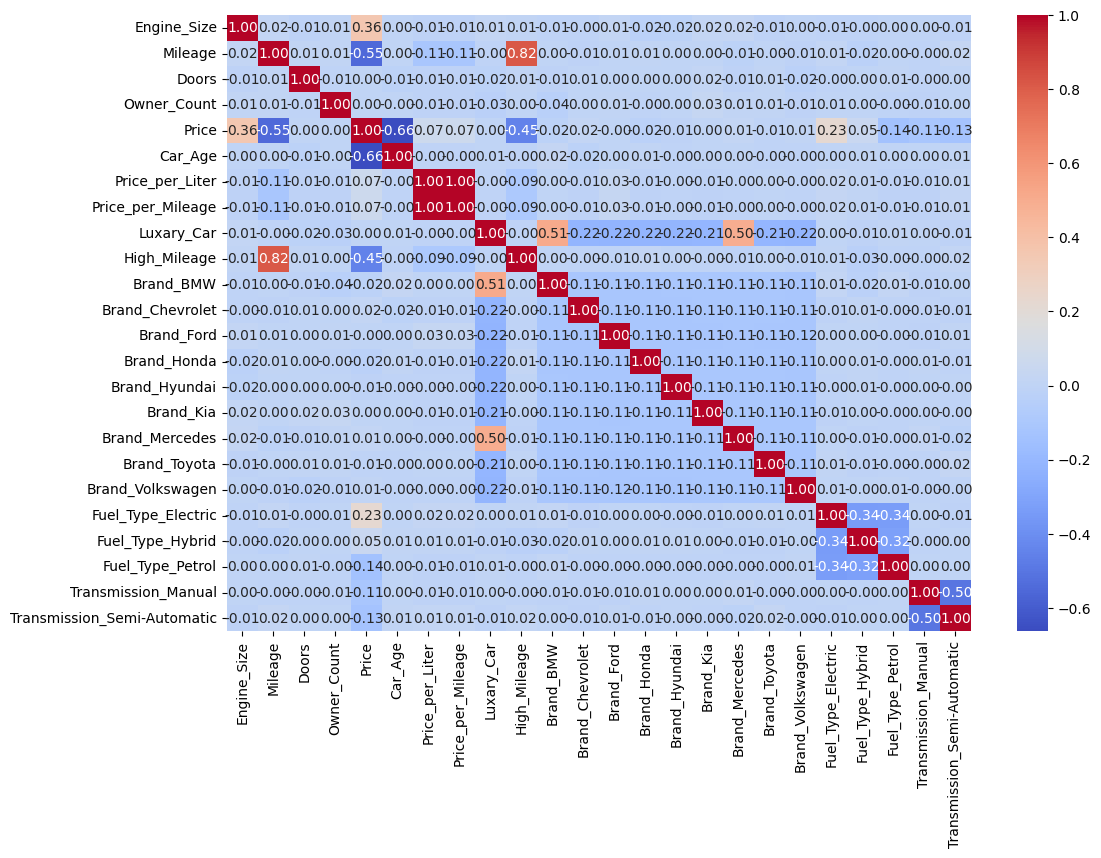

In [64]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only = True), annot=True, cmap="coolwarm", fmt=".2f")
plt.show()

In [73]:
duplicates = X_train.duplicated().sum()
print("Number of duplicate rows in training set:", duplicates)

Number of duplicate rows in training set: 0


In [74]:
print("Common rows in Train & Test:", X_train.merge(X_test, how='inner').shape[0])

Common rows in Train & Test: 0


In [75]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

feature_importance = pd.Series(rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
print(feature_importance)


Mileage                        0.344587
Engine_Size                    0.193818
Car_Age                        0.172260
Transmission_Manual            0.026024
Transmission_Semi-Automatic    0.025759
Fuel_Type_Hybrid               0.025130
Fuel_Type_Petrol               0.024937
Fuel_Type_Electric             0.024011
Luxary_Car                     0.018869
Brand_Volkswagen               0.017642
Brand_Ford                     0.017455
Brand_Chevrolet                0.017455
Brand_Honda                    0.016820
Brand_Toyota                   0.015783
Brand_Hyundai                  0.015556
Brand_Kia                      0.015156
Brand_Mercedes                 0.014979
Brand_BMW                      0.013759
dtype: float64


In [81]:
X_train_reduced = X_train[['Car_Age', 'Engine_Size', 'Mileage']]
X_test_reduced = X_test[['Car_Age', 'Engine_Size', 'Mileage']]

lm.fit(X_train_reduced, y_train)
y_pred = lm.predict(X_test_reduced)

print("R² Score:", r2_score(y_test, y_pred))

R² Score: 0.00019543523693366094
